loss is 1.2672892808914185
loss is 0.9031324982643127
loss is 0.6631412506103516
loss is 0.5108805894851685
loss is 0.4124073088169098
loss is 0.3457682430744171
loss is 0.2984241247177124
loss is 0.2633063495159149
loss is 0.23630480468273163
loss is 0.21492275595664978
loss is 0.19757549464702606
loss is 0.18321622908115387
loss is 0.17112845182418823
loss is 0.16080690920352936
loss is 0.15188537538051605
loss is 0.14409232139587402
loss is 0.1372222602367401
loss is 0.1311168670654297
loss is 0.1256522685289383
loss is 0.12073007225990295
loss is 0.11627114564180374
loss is 0.1122112050652504
loss is 0.10849745571613312
loss is 0.10508602112531662
loss is 0.10194024443626404
loss is 0.09902924299240112
loss is 0.0963268131017685
loss is 0.09381047636270523
loss is 0.09146099537611008
loss is 0.08926166594028473
loss is 0.08719802647829056
loss is 0.08525741100311279
loss is 0.08342870324850082
loss is 0.0817020982503891
loss is 0.0800689309835434
loss is 0.07852151989936829
loss is

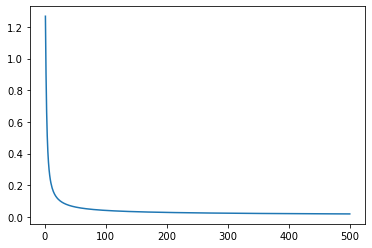

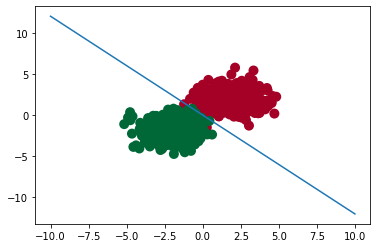

In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
# w1*x1 + w2*x2 = 0 
def model(x,w):
    return sigmod(torch.mm(x,w).squeeze(1))
def xx2(x1):
    return -w[0].item() * x1 / w[1].item() 

class LogisticModel(nn.Module):
    def __init__(self,input_dims):
        super().__init__()
        self.linear = nn.Linear(input_dims,1)

    def forward(self,x):
        out = self.linear(x)
        out = 1 / (1 + torch.exp(-out)).squeeze(1)
        return out

if __name__ == "__main__":
    n_data = torch.ones(500, 2)  # 数据的基本形态
    # 从二维高斯分布中取值，有两个均值，分别为[2,2]
    x1 = torch.normal(2 * n_data, 1)  #
    y1 = torch.zeros(500)  # 类型0 shape=(50, 1)
    x2 = torch.normal(-2 * n_data, 1)  # 类型1
    y2 = torch.ones(500)  # 类型1
    # 注意 x, y 数据的数据形式一定要像下面一样 (torch.cat 是合并数据)
    x = torch.cat((x1, x2), 0).type(torch.FloatTensor)
    y = torch.cat((y1, y2), 0).type(torch.FloatTensor)

    # plt.scatter(x.data.numpy()[:, 0], x.data.numpy()[:, 1], c=y.data.numpy(), s=100, lw=0, cmap='RdYlGn')
    # plt.show()
    X_train, X_test, y_train, y_test = train_test_split(x, y, shuffle=True)
    lr = 0.1
    w = torch.tensor(np.random.normal(0, 1, (2, 1)), dtype=torch.float32)
    w.requires_grad_(requires_grad=True)
    epochs = 500

    model = LogisticModel(2)
    loss = nn.BCELoss()
    optimizer = optim.SGD(model.parameters(),lr = lr)
    losses = []
    for i in range(epochs):
        preds = model(X_train)
        e = loss(preds,y_train)
        losses.append(e.item())
        optimizer.zero_grad()
        e.backward()
        optimizer.step()
        print("loss is " + str(e.item()))

    test = model(X_test)
    test = test.detach()
    test[test >= 0.5] = 1
    test[test < 0.5] = 0
    print("accuracy：")
    print(torch.sum(test == y_test).item() / len(y_test))

    #绘制loss曲线
    x_label = np.arange(1,epochs+1)
    plt.plot(x_label,losses)
    plt.show()

    #绘制图像
    x_plot = np.linspace(-10,10,10)
    y_plot = xx2(x_plot)
    
    plt.plot(x_plot,y_plot)
    plt.scatter(x.data.numpy()[:, 0], x.data.numpy()[:, 1], c=y.data.numpy(), s=100, lw=0, cmap='RdYlGn')
    plt.show()